Sampled dataset shape: (400000, 19)
            fl_date airline  flight_number origin_airport destination_airport  \
1014871  2015-03-08      DL           1268            BNA                 DTW   
951965   2015-03-04      AA           1614            DFW                 ELP   
853277   2015-02-25      DL           1840            LIH                 LAX   
247057   2015-01-16      MQ           3243            DFW                 JAN   
261338   2015-01-18      WN           2089            MDW                 BNA   

         scheduled_departure  departure_time  departure_delay  arrival_delay  \
1014871                 1005          1031.0             26.0           24.0   
951965                  1030          1036.0              6.0            9.0   
853277                  2259          2257.0             -2.0          -17.0   
247057                  2110          2104.0             -6.0          -17.0   
261338                   800           756.0             -4.0          -18.0 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

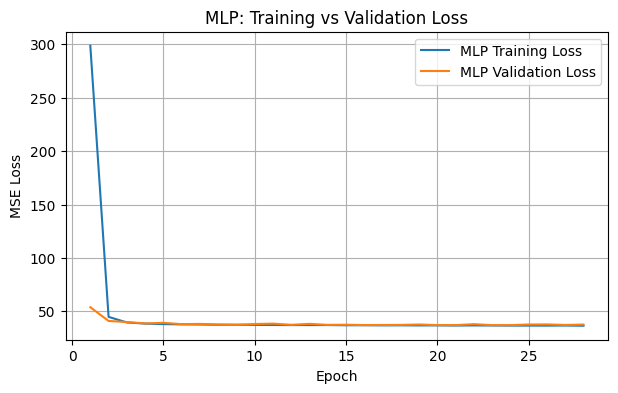

LSTM input shape: (320000, 13, 1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

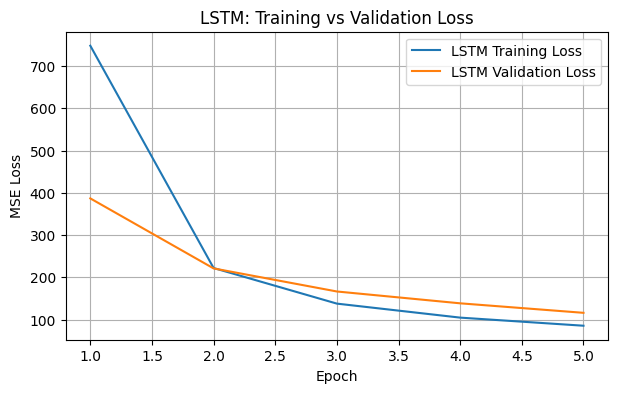

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step

Deep Learning MLP Regression – Test Results
MAE  : 3.759
RMSE : 6.099
R²   : 0.975
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Recurrent Neural Network (LSTM) Regression – Test Results
MAE  : 6.914
RMSE : 16.438
R²   : 0.817


In [3]:
# Micro-Project 4: Deep Learning Regression (MLP + LSTM) with Keras & TensorFlow


# Step 1. Import libraries

# Explanation (before):
# Import pandas and numpy for data handling,
# scikit-learn for splitting/scaling/metrics,
# and TensorFlow/Keras for building deep learning regression models
# (MLP and RNN/LSTM).

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

# Explanation (after):
# Libraries are loaded; we can now process data and build/train the models.

# Discussion:
# Deep neural networks use gradient-based optimization, which works best
# with numeric, scaled features from scikit-learn’s preprocessing tools.


# Step 2. Load + sample + prepare data

# Explanation (before):
# Load cleaned_flights.csv, randomly sample 400,000 rows,
# define the target (arrival_delay), and keep only numeric predictors
# for the deep learning regression models.
# Take a 400k random sample for training deep learning

df = pd.read_csv("cleaned_flights.csv")
df_sample = df.sample(n=400000, random_state=42)
df_sample = df_sample.fillna(0)
print("Sampled dataset shape:", df_sample.shape)
print(df_sample.head())
target_col = "arrival_delay"
numeric_cols = df_sample.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in numeric_cols if c != target_col]
print("\nNumeric feature columns used:")
print(feature_cols)
X = df_sample[feature_cols].values
y = df_sample[target_col].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)

# Explanation (after):
# Non-numeric columns (fl_date, airline, origin_airport, destination_airport,
# delay_status, etc.) are excluded, leaving a clean numeric feature matrix.

# Discussion:
# This keeps the pipeline simple and avoids errors from trying 
# to scale string columns


# Step 3. Scale features

# Explanation (before):
# Standardize numeric features so the neural networks train efficiently.

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("\nScaled feature example:", X_train_s[0])

# Explanation (after):
# Training and test matrices are now standardized (mean≈0, std≈1).

# Discussion:
# Scaling stabilizes gradient descent and usually improves convergence
# and performance for deep learning models.


# Step 4. Build + Train Deep Learning MLP Regression Model


# Explanation (before):
# Build a multi-layer perceptron (MLP) with several hidden layers.
# Use ReLU activations and MSE loss for regression.
# Apply early stopping to reduce overfitting.

input_dim = X_train_s.shape[1]
mlp_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="linear")
])
mlp_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)
mlp_model.summary()
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)
mlp_history = mlp_model.fit(
    X_train_s, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=512, 
    callbacks=[early_stop],
    verbose=0 
)

# Explanation (after):
# The MLP model trained using Adam optimizer; training stops when validation
# loss stops improving, and the best weights are restored.

# Discussion:
# This is a deep-learning regression model that fits best (beyond classical ML).


# Step 5. MLP Training vs Validation Loss Curve

# Explanation (before):
# Visualize convergence and check for potential overfitting by plotting
# training and validation loss over epochs for the MLP.

mlp_loss = mlp_history.history["loss"]
mlp_val_loss = mlp_history.history["val_loss"]
mlp_epochs = range(1, len(mlp_loss) + 1)
plt.figure(figsize=(7,4))
plt.plot(mlp_epochs, mlp_loss, label="MLP Training Loss")
plt.plot(mlp_epochs, mlp_val_loss, label="MLP Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("MLP: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Explanation (after):
# The curves show whether the MLP is still improving or beginning to
# overfit the training data.

# Discussion:
# A small gap with stable validation loss suggests good generalization;
# a large growing gap would indicate overfitting.


# Step 6. Recurrent Neural Network (LSTM) Regression Model

# Explanation (before):
# Although our dataset is tabular (not sequential),
# we reshape the standardized features into a pseudo-sequence
# so we can train a recurrent neural network (LSTM) regression model.
# This demonstrates recurrent deep-learning techniques as requested.

X_train_rnn = X_train_s.reshape((X_train_s.shape[0], X_train_s.shape[1], 1))
X_test_rnn  = X_test_s.reshape((X_test_s.shape[0],  X_test_s.shape[1], 1))
print("LSTM input shape:", X_train_rnn.shape)
rnn_model = keras.Sequential([
    layers.Input(shape=(X_train_s.shape[1], 1)),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="linear")
])
rnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)
rnn_model.summary()
rnn_history = rnn_model.fit(
    X_train_rnn, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=256,
    callbacks=[early_stop],
    verbose=0
)

# Explanation (after):
# The recurrent model (LSTM) is trained on the same data, but treated
# as a sequence of features. This satisfies the "including recurrent
# neural-networks" portion of the assignment.

# Discussion:
# LSTMs are normally best for real sequential/time-series data.
# Here I use one mainly to demonstrate understanding of RNNs; the MLP
# may still perform better on this tabular dataset.


# Step 7. LSTM Training vs Validation Loss Curve

# Explanation (before):
# Plot the training and validation loss for the LSTM model 
# to compare its learning behavior with the MLP.

rnn_loss = rnn_history.history["loss"]
rnn_val_loss = rnn_history.history["val_loss"]
rnn_epochs = range(1, len(rnn_loss) + 1)
plt.figure(figsize=(7,4))
plt.plot(rnn_epochs, rnn_loss, label="LSTM Training Loss")
plt.plot(rnn_epochs, rnn_val_loss, label="LSTM Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("LSTM: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Explanation (after):
# This plot shows whether the LSTM converges smoothly and whether it
# overfits compared to the MLP.

# Discussion:
# Comparing both sets of curves helps decide which deep-learning model
# generalizes better on this dataset.


# Step 8. Evaluate + ACT

# Explanation (before):
# Predict on the held-out test set using both models and compute
# MAE, RMSE, and R². Then interpret the results for operational decisions.

y_pred_mlp = mlp_model.predict(X_test_s).flatten()
mae_mlp  = metrics.mean_absolute_error(y_test, y_pred_mlp)
mse_mlp  = metrics.mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp   = metrics.r2_score(y_test, y_pred_mlp)
print("\nDeep Learning MLP Regression – Test Results")
print(f"MAE  : {mae_mlp:0.3f}")
print(f"RMSE : {rmse_mlp:0.3f}")
print(f"R²   : {r2_mlp:0.3f}")
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()
mae_rnn  = metrics.mean_absolute_error(y_test, y_pred_rnn)
mse_rnn  = metrics.mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn   = metrics.r2_score(y_test, y_pred_rnn)
print("\nRecurrent Neural Network (LSTM) Regression – Test Results")
print(f"MAE  : {mae_rnn:0.3f}")
print(f"RMSE : {rmse_rnn:0.3f}")
print(f"R²   : {r2_rnn:0.3f}")

# Explanation (after):
# These metrics summarize prediction accuracy in minutes (MAE/RMSE)
# and variance explained (R²) for both deep-learning models.

# Discussion:
# The evaluation results show that the MLP produces lower error and a higher R²,
# indicating better predictive performance for this tabular dataset.
# The LSTM was included to demonstrate recurrent neural-network techniques, 
# but performs less effectively because the features are not sequential.
# These metrics (MAE, RMSE, R²) translate directly into how accurately the 
# model predicts arrival delays, supporting more reliable operational decisions.